<h1 text align='center'> ISAT 341 - Machine Learning and Data Science</h1>
<br>
<h2 style="color:red", text align='center'> Lab 3 - Multivariate Linear Regression with
Imported Data
<br>
<img src="images/machine-learning.jpg" width=200; height=200>    
 
 <h2 style="color:red",text align='center'> Multiple Variable Linear Regression (The Diabetes Dataset) </h2>
    

<h3 text align='center'> (Kelsey Robertson) </h3>

<u> Description of Lab</u>

In the previous lab we moved from the simple linear regression model with one predictor to a multiple linear regression model with two or more predictors. This multivariable linear regression problem fitted a 2D surface to a dataset generated by the built-in SciKit Learn dataset generator. We used an ordinary least squares regression function, which solves mathematical problems of the form <h2 style="text-align:center; color:indigo;">
$\frac{\min}{w}\;\left\| {y - Xw} \right\|$ </h2>

where *w* is the set of coefficients. The number of coefficients depends on the number of dimensions in the data, *N(coeff) =MD* − 1, where *M >1* and is an integer. 

In the multiple regression setting, because of the potentially large number of predictors, it is more efficient to use matrices to define the regression model and the subsequent analyses. In future lessons we will considers some of the more important multiple regression formulas in matrix form.

Our predictor after the regression fit was then of the form

<p style="text-align:center; color:blue";> y = ω<sub>1</sub>x<sub>1</sub> + ω<sub>2</sub>x<sub>2</sub>... ω<sub>n</sub>x<sub>n</sub> + ω<sub>0</sub></p>

*where the w<sub>i</sub> coefficients were ‘learned’ from the analysis. That is, the <b>LinearRegression</b> method of SciKit Learn was used to train the model with data, approximate a best fit, give a prediction from the data, and test other data to see how well it fits the model. In this lab we perform a similar analysis using data imported from an external source.*

<u> Objectives</u>
- Create and use Machine Learning Models with SciKit Learn
- Learn more advanced NumPy (Numerical Python) features
- Learn how import data for remote website (UCI Datasets)
- Learn how to import and use SciKit Learn built-in datasets (Diabetes)
- Perform Multiple Regression Analysis with SciKit Learn
- Train-Test Split of data with SciKit Learn
- Create Predictive Models
- Perform 3D Plotting with MatPlotLib
- Preform Model Evaluation
    - Model Score and Accuracy

### Data and Problem Description
Ten baseline variables, <b> age</b>, <b> sex</b>, <b> body mass index</b>, <b> average blood pressure</b>, six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

| Data Set Characteristics |                          |
|--------------------------|--------------------------|
| Number of Instances:      | 442                      |
| Number of Attributes:     | First 10 columns are numeric predictive values |
| Target:                   | Column 11 is a quantitative measure of disease progression one year after baseline |
|                          | Age                  |
|                          | Sex                  |
|                          | Body Mass Index      |
|                          | Average Blood Pressure|
|                          | S1                    |
|Attributes:              | S2                     |
|                          | S3                   |
|                          | S4                   |
|                          | S5                    |
|                          | S6                     |
|                          |


<b>Note:</b> *Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).*


<h3 style="color:red",text align='center'> Comments on Diabetes dataset </h3>

#### Loading the diabetes dataset from the web
We can load the diabetes dataset from the web but you will find that the values in it are not normalized as mentioned above in the side note. This lack of normalization of the values of the
feature matrix can often lead to errors when training models.

In [1]:
import pandas as pd
df=pd.read_csv("http://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt",encoding='utf-8',comment='#', sep='\s+')
df.tail()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220
441,36,1,19.6,71.00,250,133.2,97.0,3.00,4.5951,92,57


*Normalization* of the feature matrix is performed by adjusting the values of all features so that that have similar magnitudes and there are two popular methods used: scaling and normalization.


<h4 style="color:red"> Aside- Do Some Web Research: </h4>Take a moment, research these approaches, and make sure you
understand the significance of this feature pre-processing of the dataset! Therefore, in this lab we
will import the already preprocessed diabetes dataset built into the scikit-learn machine learning
packages

In [2]:
%matplotlib inline
import numpy as np

### Part 1: Model Building in scikit-learn

In [3]:
# Load the diabetes data
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()

# the diabetes dataset is stored as a python dictionary (key:value pairs) with two keys 'target' and 'data'
# the value of the 'target' key is an 442 x 1 array and the value of the 'data' key is a 442 x 10 arrary

# store the feature matrix (X) and response vector (y)
X = diabetes.data
y = diabetes.target
print(diabetes.keys())


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


<b>"Features"</b> are also known as predictors, inputs, or attributes. The <b>"response"</b> is also known as the target, label, or output.

In [4]:
# Check the shapes of X and y #Lower cap on y is because it is a column vector. Look at shape below
print(X.shape)
print(y.shape)


(442, 10)
(442,)


## <u> More Pandas to Handle our Data</u>
<b>"Observations"</b> are also known as samples, instances, or records.

In [5]:
# examine the first 5 rows of the feature matrix (note: we are creating and including the feature names here)
import pandas as pd
pd.DataFrame(X,columns=['Age', 'Sex', 'BMI', 'BP','S1', 'S2', 'S3', 'S4', 'S5', 'S6']).tail()


,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


In [6]:
# examine correlation of features
df=pd.DataFrame(X,columns=['Age', 'Sex', 'BMI', 'BP','S1', 'S2', 'S3', 'S4', 'S5', 'S6'])
df.corr()


,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6
Age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
Sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In order to <b>build a model</b>, the features must be <b>numeric</b>, and every observation must have the <b>same features in the same order</b>. Let's build a model using only two features from the data, <b> BMI</b> and <b>BP</b>.

In [7]:
# use only two features BMI and BP
features = (2,3)
X = X[:,features]

<b> We first need to train the machine learning algorithm so we split X and y into X_train, X_test, y_train, and y_test using the SciKit Learn function train_test_split()</b>

SciKit Learn has a function that randomly shuffles the data and splits it into training and test data. The function is called <b>train_test_split</b> and by default (*unless you override the hyperparameters*) will split the with <b>75% of the rows being used for training data and 25% used for test data</b>.

In [8]:
# from sklearn.model_selection to import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.25, random_state=0)

The output of the split is shown below where I split the data with <b> 75% of the rows being used for training data and 25% used for test data</b> and *I purposefully put in the hyperparameter test_size=0.25 for illustrative purposes only*. The parameter <b> random_state</b> is the seed for the pseudo-random number generator. Use the same seed so that you get the same results on every run!

In [9]:
# examine the training and test data 
print ('X_train.shape:{}'.format(X_train.shape))
print ('y_train.shape:{}'.format(y_train.shape))

print ('X_test.shape:{}'.format(X_test.shape))
print ('y_test.shape:{}'.format(y_test.shape))


X_train.shape:(331, 2)
y_train.shape:(331,)
X_test.shape:(111, 2)
y_test.shape:(111,)


array([[<Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='BP', ylabel='BMI'>],
       [<Axes: xlabel='BMI', ylabel='BP'>,
        <Axes: xlabel='BP', ylabel='BP'>]], dtype=object)

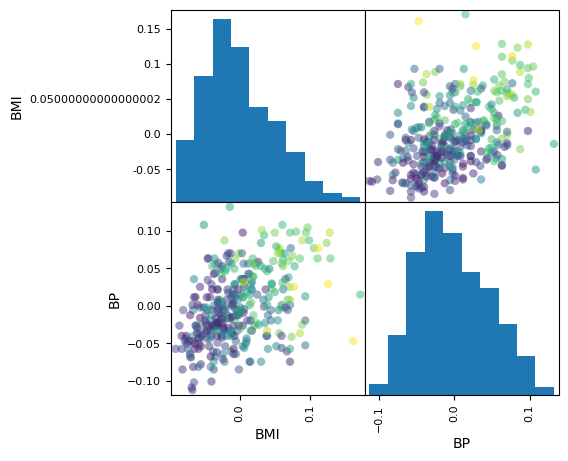

In [10]:
# create a pandas dataframe for plotting our data 
diabetes_dataframe = pd.DataFrame(X_train, columns=['BMI','BP'])

pd.plotting.scatter_matrix(diabetes_dataframe, c=y_train, figsize=(5,5), marker='o', hist_kwds={'bins':10})


## <u> Creating a Predictive Model</u>

#### <font color='green'>  Let's build the model by instantiating the LinearRegression() method and calling the model's fit function

In [11]:
# instanitate the model with default parameters (i.e. create an instance of the model)
# this is ordinary least squares regression OLS
regr = linear_model.LinearRegression()

# training the model (i.e. fit the model with training data)
regr.fit(X_train, y_train)

# printing the coefficients
print(regr.coef_)

[855.51304985 383.24036138]


## <u> Model Evaluation: Making Predictions and Scoring the Model</u>

### Part 2: Using our Model to Make Predictions

#### <font color='green'> Making Predictions:
    
Now that the model has been trained, we can now use the model to make predictions on <b> new data</b> for which we might not know the correct outcomes, i.e. the y-values. In order to <b> make a prediction</b>, the new observation must have the <b> same features as the training observations</b>, both in number and meaning.

In [12]:
# Predicting y-value based on the training. We input a normalized lists of BMI and BP data [BMI, BP]
X_new=np.array([0.019662,0.059744]) # using patient number 437
# reshape the array so numpy can use it
X_new=np.reshape(X_new, (1,-1))
print('X_new shape: {}'.format(X_new.shape))

X_new shape: (1, 2)


To make a prediction, we call the predict method of the regr object:

In [13]:
prediction = regr.predict(X_new)[0]
print('Prediction from model is: {0:2f}'.format(prediction))
print('True value from dataset is: {0:2f}'. format(y[437]))


Prediction from model is: 193.099515
True value from dataset is: 178.000000


In [14]:
print("The model's test set accuracy is {0:2f}%".format(100*regr.score(X_test,y_test)))

The model's test set accuracy is 24.616189%


### The Multivariate Model Equation

In [15]:
# get the regression coefficients (note: two features , so two coeficients) and the intercept
# printing the coefficients
coef0=regr.coef_[0]
coef1=regr.coef_[1]
intercept=regr.intercept_
print('The coefficient of the feature BMI is {}'.format(coef0))
print('The coefficient of the feature BP is {}'.format(coef1))
print('The intercept has the value of {}'.format(intercept))


The coefficient of the feature BMI is 855.5130498501965
The coefficient of the feature BP is 383.2403613816736
The intercept has the value of 153.38210506955372


### Build the model equation and test it for the values indicated in the document

The model equation is <b> <font color='red'> (use the computed values from above and substitute them as indicated):</b>

<h4 style="color:orange",text align='center'> y = [BMI Coef Value] *BMI + [BP Coef Value] *BP + [Intercept] </h4>
    
where *y* is a quantitative measure of disease (diabetes) progression one year after baseline

### Use our model equation with data to predict disease's progression

In [16]:
# use same values from above for patient 437
BMI, BP = 0.019662, 0.059744
y = 855.5130498501965 * BMI + 383.2403613816736 * BP + 153.38210506955372
print('Prediction from the model equation is: {0:.2f}'.format(y))

Prediction from the model equation is: 193.10


## <u> Creating 3D Plots with MatPlotLib</u>

### Part 3: Plotting Our Model in 3D

#### <font color='green'> Plot the training and testing data on the fitted surface

IndexError: index 3 is out of bounds for axis 0 with size 2

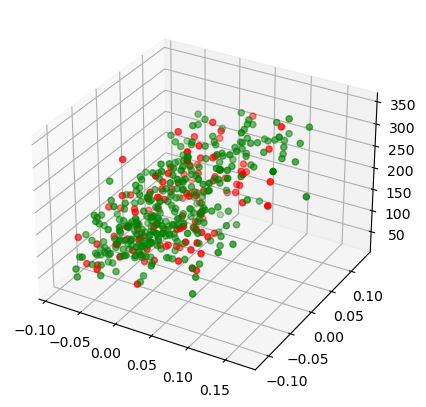

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#define an inline function (using lambda) with coefficients variables
#returned from the regression analysis
coef=regr.coef_
intercept=regr.intercept_
line=lambda x1,x2: coef[3]*x1+ coef[8]*x2 + intercept

# plotting
fig = plt.figure(figsize=(8,5))
grid_x1, grid_x2 = np.mgrid[-.1:.1:10j, -.1:.1:10j]

#ax = fig.add_subplot(111, projection='3d')
ax=Axes3D(fig)
ax=plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='green')
ax.scatter(X_test[:,0], X_test[:,1], y_test, facecolor='red')
ax.plot_surface(grid_x1, grid_x2, line(grid_x1, grid_x2), alpha=0.1, color='red')
ax.view_init(45,45)

In [ ]:
#%matplotlib inline
plt.show()
fig.savefig('MR_Lab_3.pdf')

### Comments, Questions, and Deliverables

### a.
- 24.62% accuracy for the current features BMI and BP
- After doing two other different combinations of features, I found that the accuracy of the features BP and S5 had the accuracy of 29.77% and the features S5 and S6 had the accuracy of 26.82%. 

### b.

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(442, 10)
(442,)
X_train.shape:(331, 8)
y_train.shape:(331,)
X_test.shape:(111, 8)
y_test.shape:(111,)
[ -17.84629958 -203.00237087  651.11533262  317.33928906  959.32307545
 -966.70462212 -646.7499331    52.25079622]
X_new shape: (1, 8)
The model's test set accuracy is 32.354053%
Prediction from model is: 150.745702
True value from dataset is: 178.000000
The coefficient of the feature Age is -17.846299584574492
The coefficient of the feature Sex is -203.00237086771904
The coefficient of the feature BMI is 651.1153326207948
The coefficient of the feature BP is 317.3392890589388
The coefficient of the feature S1 is 959.3230754458893
The coefficient of the feature S2 is -966.7046221207925
The coefficient of the feature S5 is -646.7499330958526
The coefficient of the feature S6 is 52.25079621604034
The intercept has the value of 152.7990464584281
Prediction from the model eq

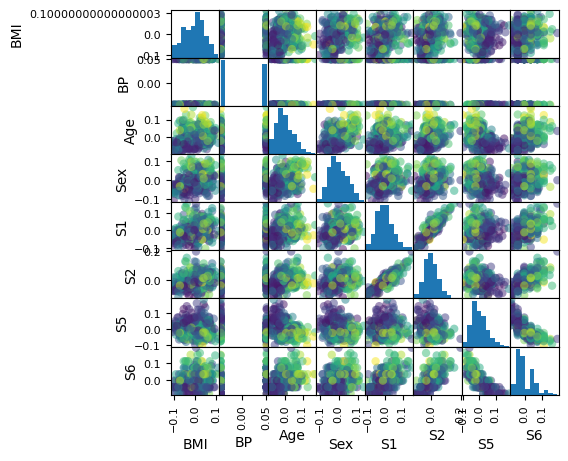

In [23]:
#import the dataset again
import pandas as pd
df=pd.read_csv("http://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt",encoding='utf-8',comment='#', sep='\s+')
df.tail()

#import the already preprocessed diabetes dataset built into the scikit-learn machine learning packages
%matplotlib inline
import numpy as np

# Load the diabetes data
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()

# store the feature matrix (X) and response vector (y)
X = diabetes.data
y = diabetes.target
print(diabetes.keys())

# Check the shapes of X and y #Lower cap on y is because it is a column vector. Look at shape below
print(X.shape)
print(y.shape)

# examine the first 5 rows of the feature matrix (note: we are creating and including the feature names here)
import pandas as pd
pd.DataFrame(X,columns=['Age', 'Sex', 'BMI', 'BP','S1', 'S2', 'S3', 'S4', 'S5', 'S6']).tail()

#first define features and make = to X
features = (0,1,2,3,4,5,6,7)
X = X[:,features]

# from sklearn.model_selection to import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.25, random_state=0)

# examine the training and test data 
print ('X_train.shape:{}'.format(X_train.shape))
print ('y_train.shape:{}'.format(y_train.shape))

print ('X_test.shape:{}'.format(X_test.shape))
print ('y_test.shape:{}'.format(y_test.shape))

# create a pandas dataframe for plotting our data 
diabetes_dataframe = pd.DataFrame(X_train, columns=['BMI','BP','Age','Sex','S1','S2','S5','S6'])

pd.plotting.scatter_matrix(diabetes_dataframe, c=y_train, figsize=(5,5), marker='o', hist_kwds={'bins':10})

# instanitate the model with default parameters (i.e. create an instance of the model)
# this is ordinary least squares regression OLS
regr = linear_model.LinearRegression()

# training the model (i.e. fit the model with training data)
regr.fit(X_train, y_train)

# printing the coefficients
print(regr.coef_)

# Predicting y-value based on the training
X_new=np.array([0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,0.031193,0.007207]) # using patient number 437
# reshape the array so numpy can use it
X_new=np.reshape(X_new, (1,-1))
print('X_new shape: {}'.format(X_new.shape))

# the model's accuracy 
print("The model's test set accuracy is {0:8f}%".format(100*regr.score(X_test,y_test)))

# make a prediction
prediction = regr.predict(X_new)[0]
print('Prediction from model is: {0:8f}'.format(prediction))
print('True value from dataset is: {0:8f}'. format(y[437]))

# get the regression coefficients (note: two features , so two coeficients) and the intercept
# printing the coefficients
coef0=regr.coef_[0]
coef1=regr.coef_[1]
coef2=regr.coef_[2]
coef3=regr.coef_[3]
coef4=regr.coef_[4]
coef5=regr.coef_[5]
coef6=regr.coef_[6]
coef7=regr.coef_[7]
intercept=regr.intercept_
print('The coefficient of the feature Age is {}'.format(coef0))
print('The coefficient of the feature Sex is {}'.format(coef1))
print('The coefficient of the feature BMI is {}'.format(coef2))
print('The coefficient of the feature BP is {}'.format(coef3))
print('The coefficient of the feature S1 is {}'.format(coef4))
print('The coefficient of the feature S2 is {}'.format(coef5))
print('The coefficient of the feature S5 is {}'.format(coef6))
print('The coefficient of the feature S6 is {}'.format(coef7))
print('The intercept has the value of {}'.format(intercept))

# use same values from above for patient 437
Age, Sex, BMI, BP, S1, S2, S5, S6 = 0.041708,0.050680,0.019662, 0.059744, -0.005697,-0.002566,0.031193,0.007207
#y = [Age Coef Value] *Age + [Sex Coef Value] *Sex +[BMI Coef Value] *BMI + [BP Coef Value] *BP + [S1 Coef Value] *S1 + [S2 Coef Value] *S2 + [S5 Coef Value] *S5 +[S6 Coef Value] *S6 +[Intercept]
y = -17.846299584574492 *Age + -203.00237086771904 *Sex + 651.1153326207948 * BMI + 317.3392890589388 * BP + 959.3230754458893 *S1 + -966.7046221207925 *S2 + -646.7499330958526 *S5 + 52.25079621604034*S6 +152.7990464584281 
print('Prediction from the model equation is: {0:.8f}'.format(y))

This specific model did impove the original model because the accuracy of the model increased. The model's test set accuracy is now at 32.354053% with eight features instead of having just two. The code above describe how to make the model with eight different features and how to plot it as well (if it were to be possible).